# 統計四支台股在2020年度的收盤價

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("bmh")
%matplotlib inline

## 資料讀取

In [121]:
symbol_ls = ['2330', '2454', '2317', '2412']

df2020_ls = []
for symbol in symbol_ls:
    df = pd.read_csv(f'./data/{symbol}.csv')
    df['date'] = pd.to_datetime(df['date']) #將資料型別轉換為日期型別
    df = df.set_index('date') # 將date設定為index
    df2020 = df['2020']
    df2020.trade_volume = df2020.trade_volume.astype('float').copy()
    df2020.closing_price = df2020.closing_price.astype('float').copy()
    df2020_ls.append(df2020)

df2020_ls[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2020-01-02 to 2020-12-31
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trade_volume   245 non-null    float64
 1   trade_value    245 non-null    int64  
 2   opening_price  245 non-null    float64
 3   highest_price  245 non-null    float64
 4   lowest_price   245 non-null    float64
 5   closing_price  245 non-null    float64
 6   change         245 non-null    object 
 7   transaction    245 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 17.2+ KB


## 收盤價&成交量的趨勢圖

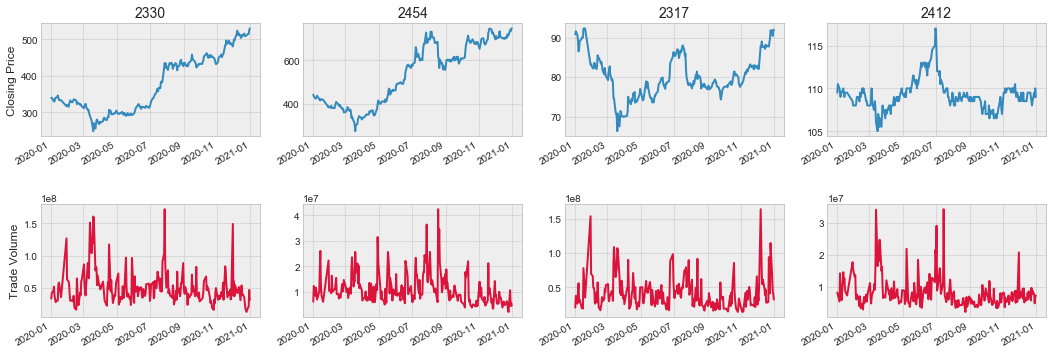

In [57]:
plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
for i, df in enumerate(df2020_ls, 1):
    plt.subplot(2, 4, i)   
    df['closing_price'].plot()
    plt.xticks(rotation=30)
    plt.xlabel(None)
    plt.title(f"{symbol_ls[i-1]}", fontsize=14)
    if i == 1: plt.ylabel('Closing Price', fontsize=12)
    
    plt.subplot(2, 4, i+4)  
    df['trade_volume'].plot(color='crimson')
    plt.xticks(rotation = 30) 
    plt.xlabel(None)
    if i == 1: plt.ylabel('Trade Volume', fontsize=12)

## 兩周、月、季均線圖

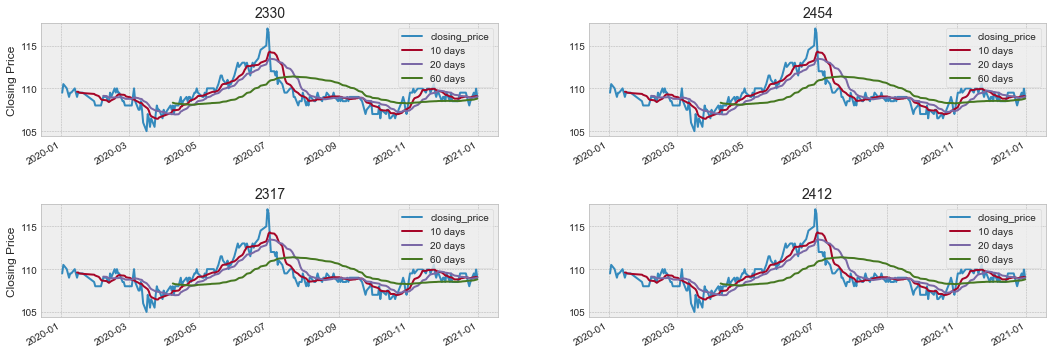

In [58]:
ma_day = [10, 20, 60]
for ma in ma_day:
    for df in df2020_ls:
        column_name = f'{ma} days'
        df[column_name] = df['closing_price'].rolling(ma).mean()

plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
for i, df in enumerate(df2020_ls, 1):
    plt.subplot(2, 2, i)   
    s['closing_price'].plot()
    s['10 days'].plot()
    s['20 days'].plot()
    s['60 days'].plot()
    plt.legend()
    plt.xticks(rotation = 30)
    plt.xlabel(None)
    plt.title(f"{symbol_ls[i-1]}", fontsize=14)
    if i == 1 or i == 3: plt.ylabel('Closing Price', fontsize=12)

## 每日漲跌幅

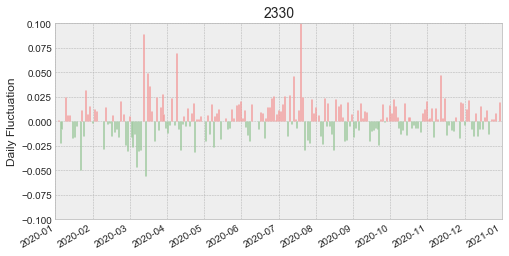

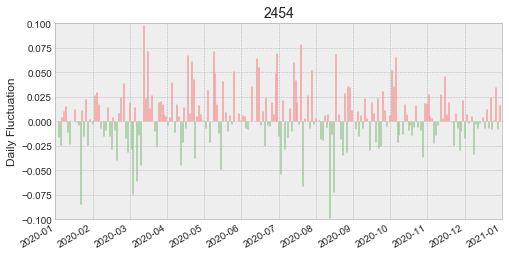

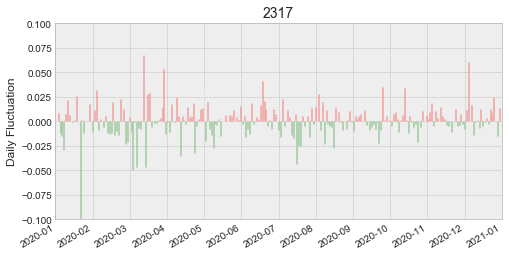

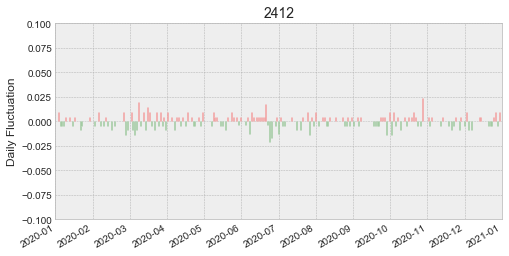

In [69]:
for df in df2020_ls:
    df['Daily Fluctuation'] = df['closing_price'].pct_change()
    df['positive'] = df['Daily Fluctuation'] > 0

for i in range(4):
    fig, ax = plt.subplots(figsize=(8, 4))
    df2020_ls[i]['Daily Fluctuation'].plot(kind='bar', color=df2020_ls[i].positive.map({True: 'r', False: 'g'}))    #產生顏色劃分直方圖
    dates = pd.date_range(datetime.datetime(2020, 1, 1), datetime.datetime(2021, 1, 1), freq='MS')    #產生xticks的標籤
    ax.xaxis.set_major_locator(plt.LinearLocator(len(dates)))     #設定刻度區塊數量
    ax.xaxis.set_major_formatter(plt.FixedFormatter([x.strftime('%Y-%m') for x in dates]))    #設定xticks的標籤
    fig.autofmt_xdate(rotation = 30)    #旋轉標籤
    ax.set_ylim(-0.1, 0.1)
    ax.set_ylabel('Daily Fluctuation', fontsize=12)
    ax.set_title(f'{symbol_ls[i]}', fontsize=14)
    ax.set_xlabel(None)

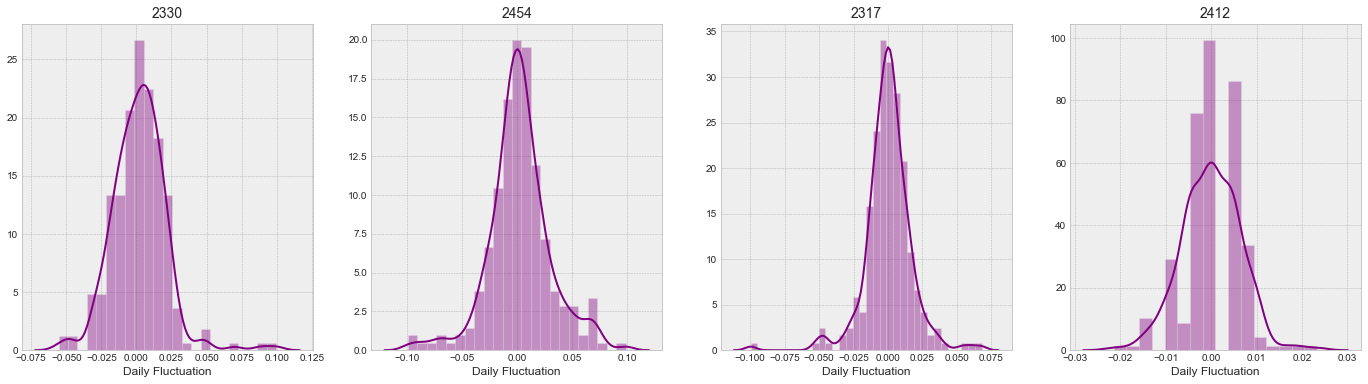

In [77]:
plt.figure(figsize=(24, 6))
for i, df in enumerate(df2020_ls, 1):
    plt.subplot(1, 4, i)  
    sns.distplot(df['Daily Fluctuation'].dropna(), color='purple')
    plt.xlabel('Daily Fluctuation', fontsize=12)
    plt.ylabel(None)
    plt.title(f'{symbol_ls[i-1]}', fontsize=14)

## 各股之間相關性

### 收盤價

In [78]:
closing_df = pd.DataFrame()
dailyReturn_df = pd.DataFrame()
for i, s in enumerate(symbol_ls):
    closing_df[f'{s}'] = df2020_ls[i]['closing_price']
    dailyReturn_df[f'{s}'] = df2020_ls[i]['Daily Fluctuation'].dropna()

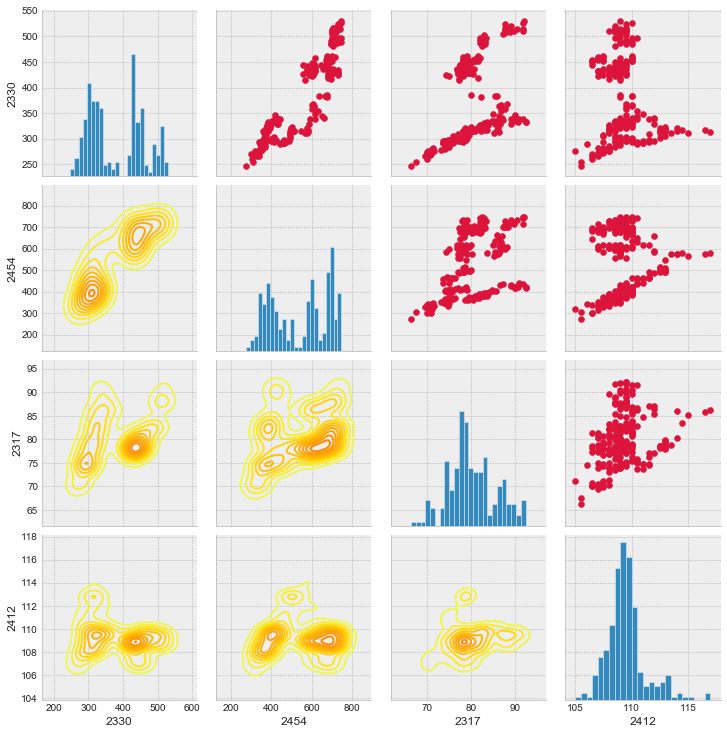

In [83]:
pg = sns.PairGrid(closing_df)
pg.map_diag(plt.hist, bins = 24)
pg.map_upper(plt.scatter, color='crimson')
pg.map_lower(sns.kdeplot, cmap='Wistia')

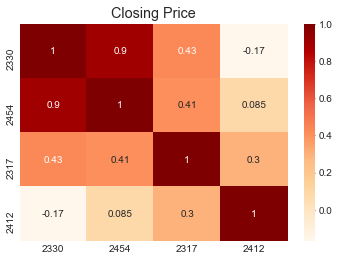

In [84]:
plt.title('Closing Price')
sns.heatmap(closing_df.corr(), annot=True, cbar=True, cmap="OrRd")

### 漲跌幅

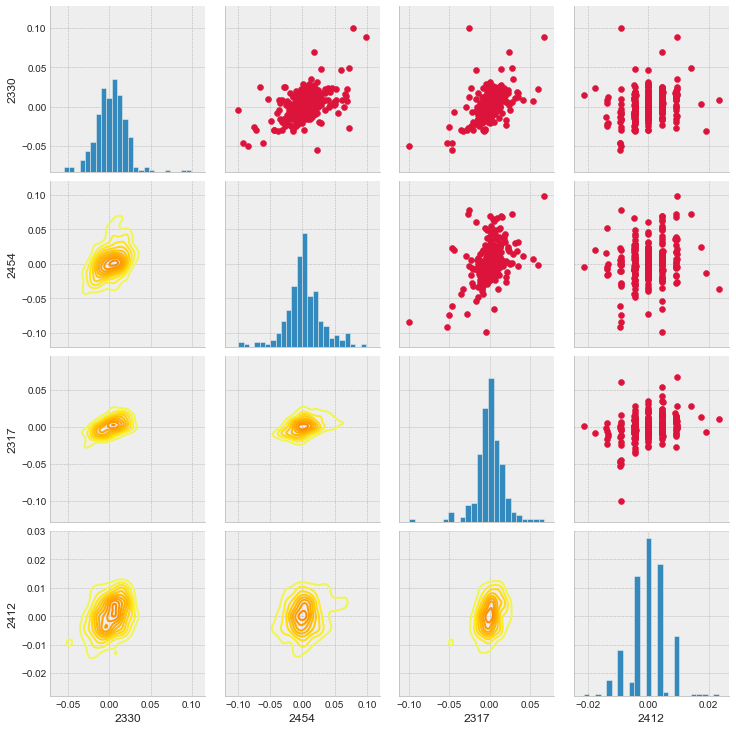

In [85]:
pg = sns.PairGrid(dailyReturn_df)
pg.map_diag(plt.hist, bins = 24)
pg.map_upper(plt.scatter, color='crimson')
pg.map_lower(sns.kdeplot, cmap='Wistia')

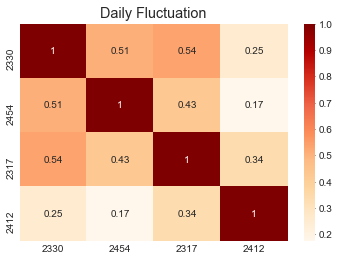

In [86]:
plt.title('Daily Fluctuation')
sns.heatmap(dailyReturn_df.corr(), annot=True, cbar=True, cmap="OrRd")